In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


(18, 144)
(144,)


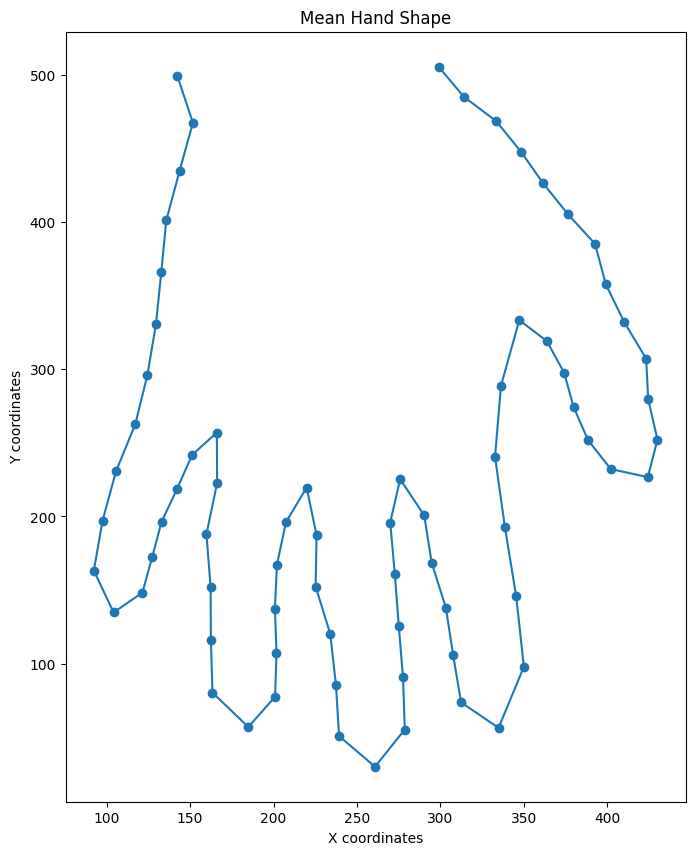

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("all-hands.dat",sep=',', header=None);
print(data.shape)
mean_hand = np.mean(data, axis = 0)
mean_hand = np.array(mean_hand)
mean_hand_reshaped = mean_hand.reshape(72, 2)
print(mean_hand.shape)
data = np.asarray(data)
plt.figure(figsize=(8,10))
plt.plot(mean_hand_reshaped[:, 0], mean_hand_reshaped[:, 1], marker='o', linestyle='-')
plt.title("Mean Hand Shape")
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.show()

In [4]:
## 2)
mean_centered_data = data - mean_hand

n = mean_centered_data.shape[0]
covariance_matrix = (mean_centered_data.T @ mean_centered_data) / (n- 1)
total_variance = np.trace(covariance_matrix)

# Covariance_matrix and total variance is below
covariance_matrix, total_variance


(array([[549.04575163,  -4.16339869, 533.11111111, ...,  45.52941176,
         600.87581699,  43.32026144],
        [ -4.16339869,  31.0751634 ,  -5.43464052, ...,  52.73529412,
          -7.40522876,  53.20915033],
        [533.11111111,  -5.43464052, 524.52614379, ...,  35.20588235,
         579.8496732 ,  30.60130719],
        ...,
        [ 45.52941176,  52.73529412,  35.20588235, ..., 158.61764706,
          37.82352941, 162.70588235],
        [600.87581699,  -7.40522876, 579.8496732 , ...,  37.82352941,
         666.96732026,  37.71895425],
        [ 43.32026144,  53.20915033,  30.60130719, ..., 162.70588235,
          37.71895425, 169.00653595]]),
 48685.06862745098)

In [5]:
covariance_x1_x2 = covariance_matrix[0][2]
covariance_x1_x2

533.1111111111111

In [6]:
x1 = data[:,0]
x2 = data[:,2]
correlation = (np.dot(x1.T, x2)) / (np.linalg.norm(x1) * np.linalg.norm(x2))
correlation

0.9999507626010683

## The correlation is very strong because two adjacent points are likely constrained by the hand's structure across the data sets, which is why they have a high degree similarity. 

In [7]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
eigenvalues


array([-8.63126233e-12, -6.64726943e-12, -5.77686606e-12, -5.14169809e-12,
       -4.44872758e-12, -4.37928144e-12, -3.94169741e-12, -3.00161829e-12,
       -2.90475642e-12, -2.18563839e-12, -2.08699373e-12, -1.94218557e-12,
       -1.67226368e-12, -1.51401668e-12, -1.48112745e-12, -1.47466933e-12,
       -1.35951665e-12, -1.32100191e-12, -1.22043598e-12, -1.05007067e-12,
       -1.01459266e-12, -9.84003921e-13, -9.18340595e-13, -7.90562111e-13,
       -7.65370853e-13, -6.79715035e-13, -6.29243929e-13, -6.08439155e-13,
       -6.05904216e-13, -5.76707240e-13, -5.76702392e-13, -4.80243574e-13,
       -4.62628004e-13, -3.97192958e-13, -3.96272396e-13, -3.65184829e-13,
       -3.53217916e-13, -3.28283194e-13, -3.06287361e-13, -3.05935593e-13,
       -2.90415120e-13, -2.70936971e-13, -2.54426968e-13, -2.40369678e-13,
       -2.26842031e-13, -2.25502128e-13, -2.16053268e-13, -2.04467086e-13,
       -2.03046823e-13, -1.90901564e-13, -1.79849459e-13, -1.76686140e-13,
       -1.62319191e-13, -

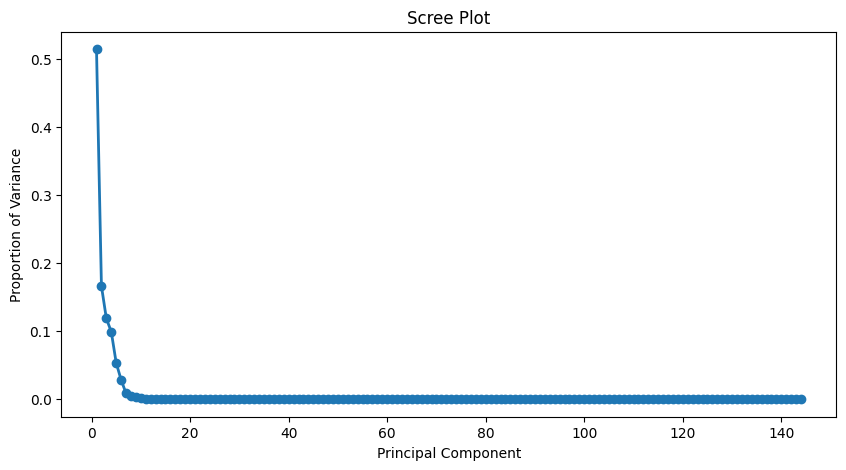

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [29]:
sorted_eigenvalues = eigenvalues[::-1]
proportion_of_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
principal_components = np.arange(len(sorted_eigenvalues)) + 1

plt.figure(figsize=(10, 5))
plt.plot(principal_components, proportion_of_variance, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance')
plt.show()
small_num = np.exp(-8)
count = np.sum(sorted_eigenvalues > small_num or sorted_eigenvalues < small_num)
count

The non zero eigenvalues tell you the number of dimensions with significant variance.

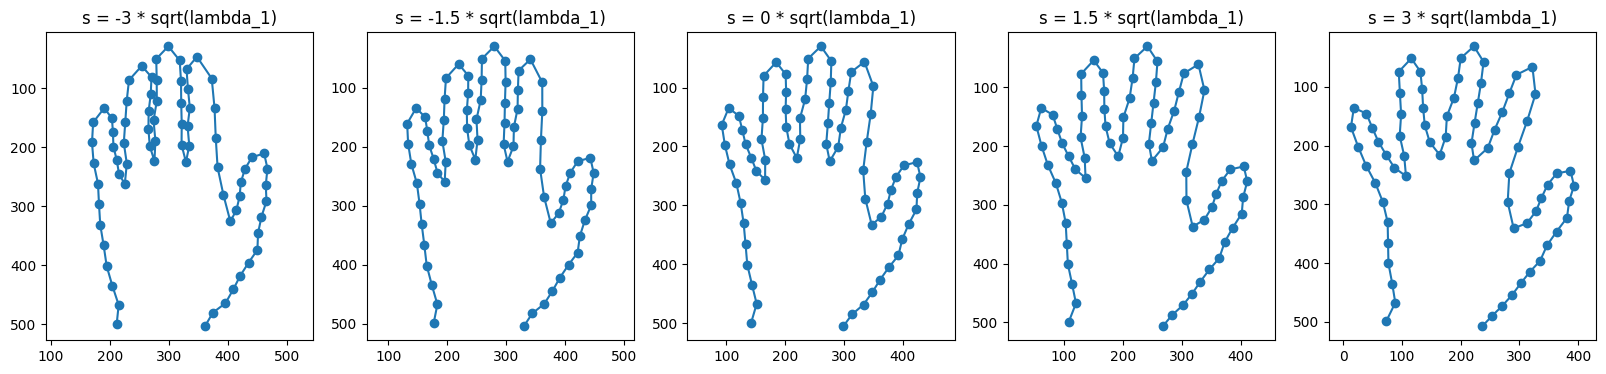

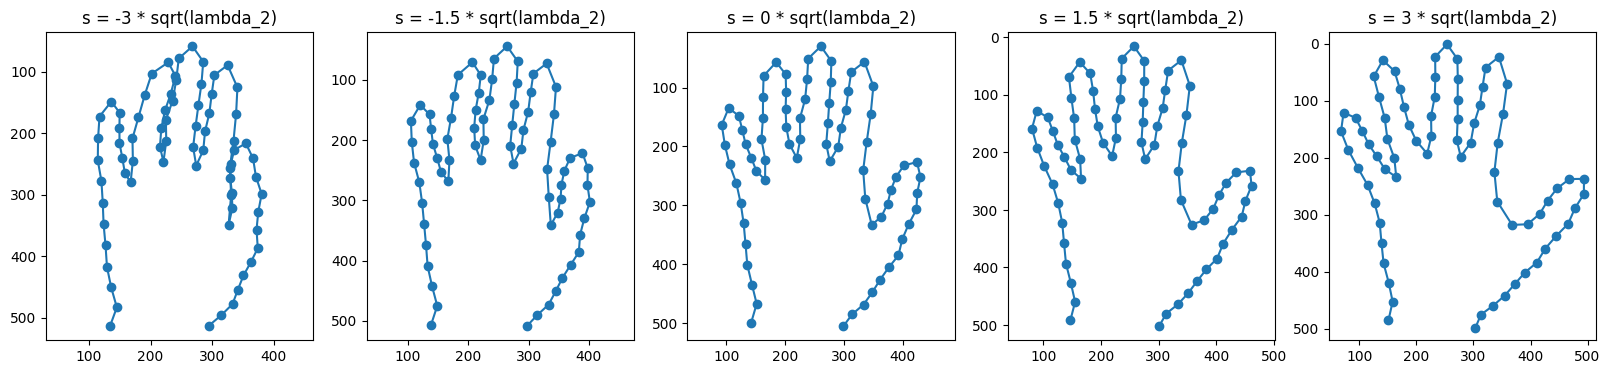

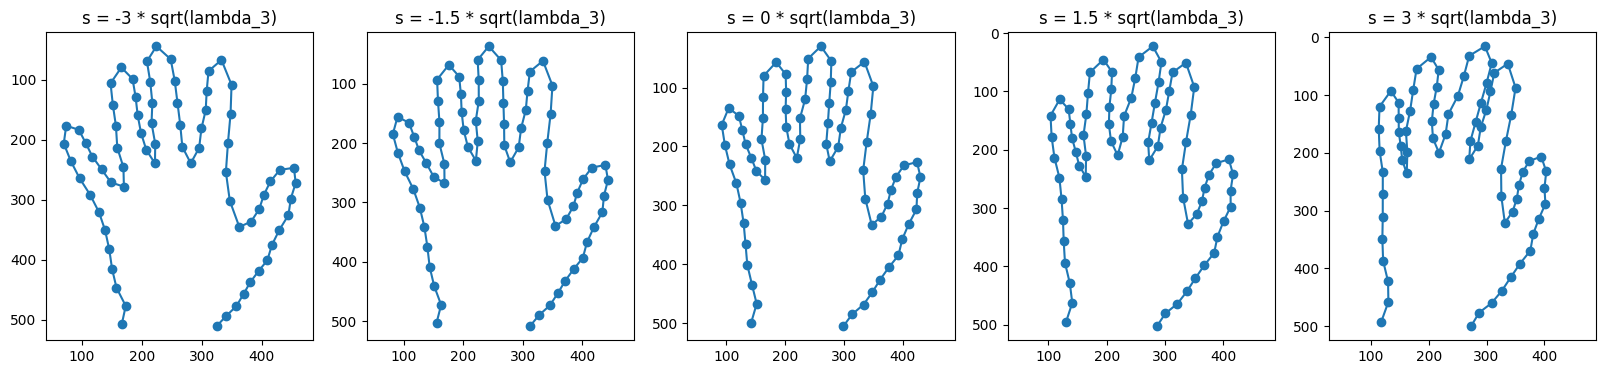

In [9]:
sorted_eigenvectors = eigenvectors[:, ::-1]
e_1 = sorted_eigenvectors[:, 0]
lambda_1 = sorted_eigenvalues[0]
scales = [-3, -1.5, 0, 1.5, 3]

new_hand_shapes = np.asarray([mean_hand + scale * np.sqrt(lambda_1) * e_1 for scale in scales])

plt.figure(figsize=(20, 4))

for i, hand_shape in enumerate(new_hand_shapes):
    plt.subplot(1, 5, i+1)
    hand_shape_reshaped = hand_shape.reshape(72, 2)
    plt.plot(hand_shape_reshaped[:, 0], hand_shape_reshaped[:, 1], 'o-')
    plt.title(f"s = {scales[i]} * sqrt(lambda_1)")
    plt.gca().invert_yaxis()
    plt.axis('equal')

plt.show


e_2 = sorted_eigenvectors[:, 1]
lambda_2 = sorted_eigenvalues[1]
scales = [-3, -1.5, 0, 1.5, 3]

new_hand_shapes = np.asarray([mean_hand + scale * np.sqrt(lambda_2) * e_2 for scale in scales])

plt.figure(figsize=(20, 4))

for i, hand_shape in enumerate(new_hand_shapes):
    plt.subplot(1, 5, i+1)
    hand_shape_reshaped = hand_shape.reshape(72, 2)
    plt.plot(hand_shape_reshaped[:, 0], hand_shape_reshaped[:, 1], 'o-')
    plt.title(f"s = {scales[i]} * sqrt(lambda_2)")
    plt.gca().invert_yaxis()
    plt.axis('equal')

plt.show()

e_3 = sorted_eigenvectors[:, 2]
lambda_3 = sorted_eigenvalues[2]
scales = [-3, -1.5, 0, 1.5, 3]

new_hand_shapes = np.asarray([mean_hand + scale * np.sqrt(lambda_3) * e_3 for scale in scales])

plt.figure(figsize=(20, 4))

for i, hand_shape in enumerate(new_hand_shapes):
    plt.subplot(1, 5, i+1)
    hand_shape_reshaped = hand_shape.reshape(72, 2)
    plt.plot(hand_shape_reshaped[:, 0], hand_shape_reshaped[:, 1], 'o-')
    plt.title(f"s = {scales[i]} * sqrt(lambda_3)")
    plt.gca().invert_yaxis()
    plt.axis('equal')

plt.show()

In [10]:
dimensions= 0
cumulative_sum = 0

for proportion in proportion_of_variance:
    cumulative_sum += proportion
    if cumulative_sum < 0.95: 
        dimensions += 1
    else:
        break

dimensions


4

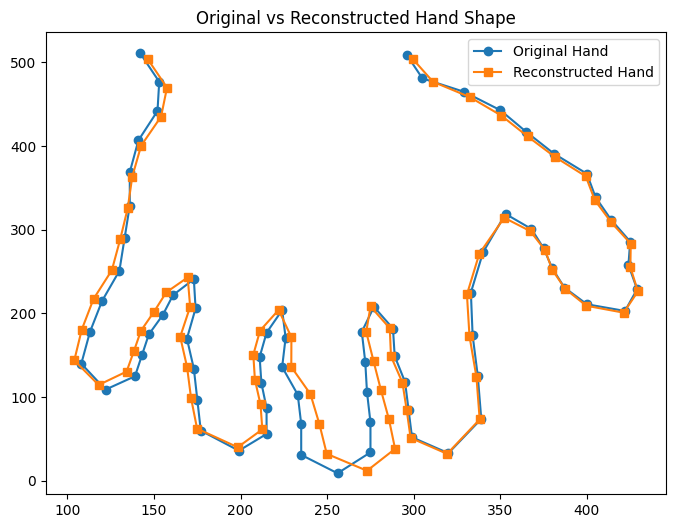

array([-51.3701075 ,  53.71856104, 115.91396854, -85.52738177])

In [11]:
# h)

centered_first_hand = mean_centered_data[0, :]
first_hand = data[0, :]
reduced_eigenvectors = sorted_eigenvectors[:, :dimensions]

weights = reduced_eigenvectors.T @ centered_first_hand 

reconstructed_first_hand = mean_hand + reduced_eigenvectors @ weights

plt.figure(figsize=(8, 6))
plt.plot(first_hand.reshape(72, 2)[:, 0], first_hand.reshape(72, 2)[:, 1], 'o-', label='Original Hand')
plt.plot(reconstructed_first_hand.reshape(72, 2)[:, 0], reconstructed_first_hand.reshape(72, 2)[:, 1], 's-', label='Reconstructed Hand')
plt.title("Original vs Reconstructed Hand Shape")
plt.legend()
plt.show()

weights

In [12]:
# 2 a)

data = pd.read_csv('OASIS-hippocampus.csv')
train_data = data[data['TrainData'] == 1]
test_data = data[data['TrainData'] == 0]
hippocampus_data = train_data[['LeftHippoVol', 'RightHippoVol']].values

hippocampus_data_scaled = (hippocampus_data - np.min(hippocampus_data, axis=0)) / (np.max(hippocampus_data, axis=0) - np.min(hippocampus_data, axis=0))

X = np.hstack((np.ones((hippocampus_data_scaled.shape[0], 1)), hippocampus_data_scaled))
Y = train_data['Dementia']
Y = Y.to_numpy()

X[:5], Y

(array([[1.        , 0.31255619, 0.28879037],
        [1.        , 0.30326641, 0.33818873],
        [1.        , 0.12256518, 0.13964535],
        [1.        , 0.35331136, 0.56649778],
        [1.        , 0.79442613, 0.86668778]]),
 array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 0]))

In [13]:
beta_init = np.random.rand(X.shape[1])

In [14]:
# 2 b)

def nll(X, Y, beta):
    z = X @ beta
    total = 0
    
    for i in range(X.shape[0]):
        total += (Y[i] - 1) * z[i] - np.log(1 + np.exp(-z[i]))
    
    return -total

def nll_gradient(X, Y, beta):
    gradient = np.zeros_like(beta)
    z = X @ beta
    for i in range(X.shape[0]):
        for k in range(len(beta)):
            gradient[k] += ((Y[i] - 1) + (np.exp(-z[i]) / (1 + np.exp(-z[i])))) * X[i, k]

    return gradient


def logistic_classifier(X, Y, beta, step_size, epilson):
    nll_values = []
    norm = float('inf')
    
    # while norm > epilson:
    for i in range(500):
        nll_value = nll(X, Y, beta)
        nll_values.append(nll_value)
        print(nll_value)
        gradient = nll_gradient(X, Y, beta)
        norm = np.linalg.norm(gradient)
        print("Norm", norm)
        beta = beta + step_size * gradient

    return nll_values, beta
    
step_size = 0.045
nll_list, final_beta = logistic_classifier(X, Y, beta_init, step_size, 0.025)

91.6141230973553
Norm 37.44979937199703
83.69124858055049
Norm 26.189194569633727
74.30212024396292
Norm 16.49524028505994
71.8719605468857
Norm 12.99801913216516
69.47503564213828
Norm 9.85162294728281
67.95765337507885
Norm 7.951756199987524
66.63018629212354
Norm 6.402424344793628
65.5821162422079
Norm 5.401181941501517
64.6760348221828
Norm 4.668205800875822
63.898251560481995
Norm 4.182360164108694
63.21271485740699
Norm 3.8317584271267657
62.60400448979898
Norm 3.5728531327018147
62.05864681802869
Norm 3.3644925549393156
61.56747688647538
Norm 3.1876267882108547
61.1233810855308
Norm 3.0302655076170844
60.72061843324077
Norm 2.886854627851171
60.35446379497673
Norm 2.754185798689606
60.020867032915035
Norm 2.630620398187944
59.71634645337497
Norm 2.5150396212501502
59.437859403466874
Norm 2.4066836892717127
59.182743703890814
Norm 2.304910929129317
58.94865549167685
Norm 2.209185548995745
58.733527646306385
Norm 2.1190239579803585
58.53553110026169
Norm 2.0339959153542413
58.3530

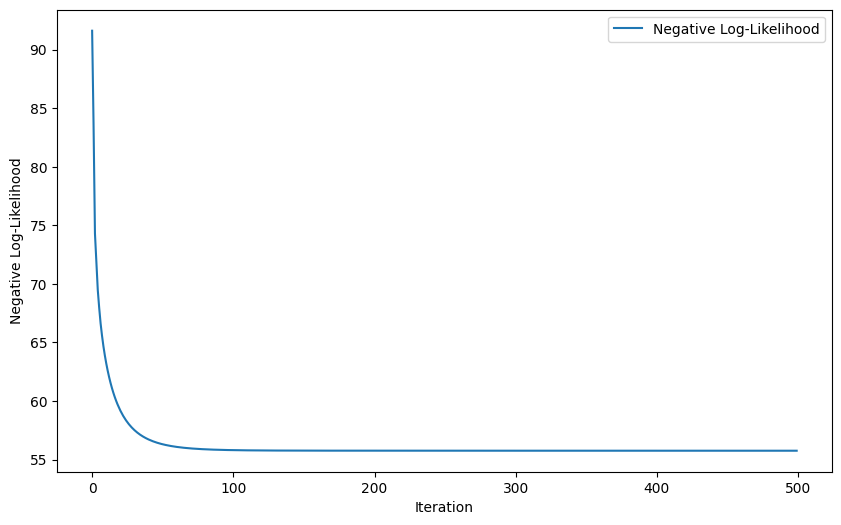

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(nll_list, label='Negative Log-Likelihood')
plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood')
plt.legend()
plt.show()

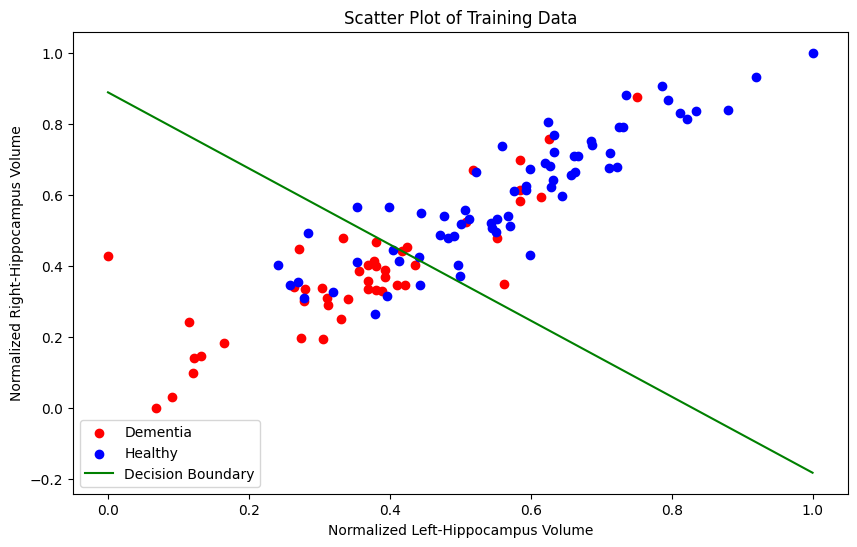

In [16]:
def decision_boundary(beta, x):
    return (-beta[0] - beta[1]*x) / beta[2]

x1_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 200)
x2_values = decision_boundary(final_beta, x1_values)

plt.figure(figsize=(10,6))
plt.scatter(X[Y == 1][:, 1], X[Y == 1][:, 2], color='red', label='Dementia')
plt.scatter(X[Y == 0][:, 1], X[Y == 0][:, 2], color='blue', label='Healthy')
plt.plot(x1_values, x2_values, color='green', label='Decision Boundary')
plt.xlabel('Normalized Left-Hippocampus Volume')
plt.ylabel('Normalized Right-Hippocampus Volume')
plt.legend()
plt.title('Scatter Plot of Training Data')
plt.show()


In [17]:
test_hippocampus_data = test_data[['LeftHippoVol', 'RightHippoVol']].values
test_hippocampus_data_scaled = (test_hippocampus_data - np.min(hippocampus_data, axis=0)) / \
                               (np.max(hippocampus_data, axis=0) - np.min(hippocampus_data, axis=0))

X_test = np.hstack((np.ones((test_hippocampus_data_scaled.shape[0], 1)), test_hippocampus_data_scaled))
Y_test = test_data['Dementia'].to_numpy()


probabilities = 1 / (1 + np.exp(-X_test @ final_beta))

predictions = probabilities >= 0.5
correct_predictions = np.sum(predictions == Y_test)

accuracy = correct_predictions / len(Y_test)
accuracy



0.6902654867256637

# Compared to HW1 where I had adchieved an accuracy of 71%, my prediction accuracy is about 70% which is about the same accuracy using the logistic regression model.

In [18]:
# 3 A)

trainX = pd.read_csv("trainX.txt",  sep=',', header=None).values
trainY = pd.read_csv("trainY.txt",  sep='\s+', header=None).values

filter_indices = (trainY == 3) | (trainY == 5)

X_filtered = trainX[filter_indices.flatten()]
Y_filtered = trainY[filter_indices.flatten()]
Y_filtered = np.where(Y_filtered == 3, 1, 0)
X_intercept = np.hstack([np.ones((X_filtered.shape[0], 1)), X_filtered])

X_intercept.shape




(103, 785)

In [19]:
beta_2 = np.random.rand(X_intercept.shape[1])
print(beta_2.shape)
# 3 B)
nll_list, new_beta = logistic_classifier(X_intercept, Y_filtered, beta_2, 0.005, 0.025)
print(new_beta.shape)

(785,)
[2484.07162219]


/var/folders/3y/917bfx25513c96jg7q7w9z8m0000gn/T/ipykernel_32326/2401374428.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gradient[k] += ((Y[i] - 1) + (np.exp(-z[i]) / (1 + np.exp(-z[i])))) * X[i, k]


Norm 301.79359704803227
[2028.6747461]
Norm 301.7935970218725
[1573.2778706]
Norm 301.79359547559665
[1117.88106497]
Norm 301.7933294808106
[662.59913481]
Norm 301.1382047381859
[249.49648575]
Norm 213.1504166377741
[126.49223174]
Norm 63.97570153584055
[108.55263726]
Norm 55.20559318623387
[94.14185027]
Norm 50.51987558028734
[81.8247893]
Norm 47.217696794405406
[71.04223794]
Norm 44.08778769770022
[61.70910359]
Norm 40.4628868771576
[53.92650942]
Norm 36.437361478157285
[47.6379577]
Norm 32.64262399005114
[42.57880178]
Norm 29.426983386047905
[38.4473404]
Norm 26.799460891541496
[35.00452747]
Norm 24.6368574096923
[32.08430163]
Norm 22.81001462020871
[29.57468609]
Norm 21.223001756564237
[27.39836932]
Norm 19.81241359099409
[25.49951432]
Norm 18.537488188605558
[23.8358143]
Norm 17.372611143873783
[22.37366193]
Norm 16.303207126887997
[21.0850777]
Norm 15.322532340220318
[19.94585811]
Norm 14.427886608379472
[18.93467865]
Norm 13.617059591273348
[18.03279689]
Norm 12.886367387602979


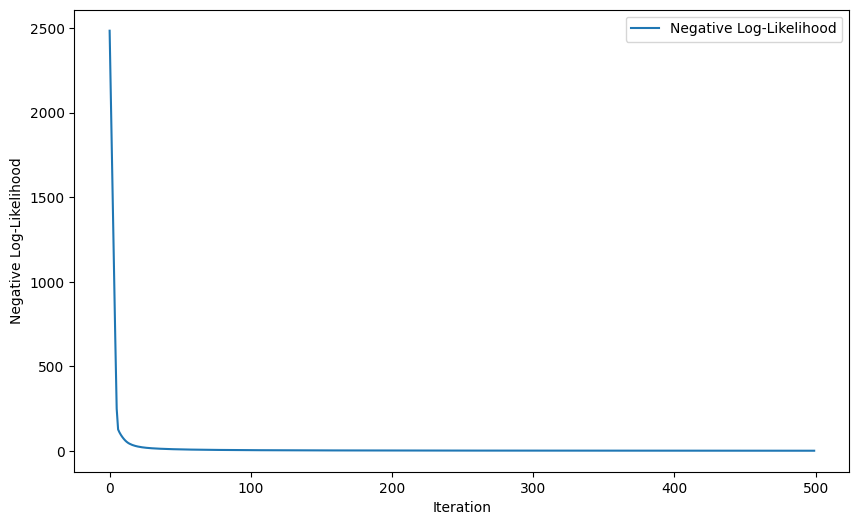

In [20]:
# 3 C)

plt.figure(figsize=(10, 6))
plt.plot(nll_list, label='Negative Log-Likelihood')
plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood')
plt.legend()
plt.show()

In [21]:
# 3D)

testX = pd.read_csv("testX.txt",  sep=',', header=None).values
testY = pd.read_csv("testY.txt",  sep='\s+', header=None).values

filter_indices = (testY == 3) | (testY == 5)

X_filtered = testX[filter_indices.flatten()]
Y_filtered = testY[filter_indices.flatten()]
Y_filtered = np.where(Y_filtered == 3, 1, 0)
# print(X_filtered.shape, Y_filtered.shape)
X_intercept = np.hstack((np.ones((X_filtered.shape[0], 1)), X_filtered))
# print(X_intercept.shape, final_beta.shape)
probabilities = 1 / (1 + np.exp(-X_intercept @ new_beta))

predictions = np.where(probabilities > 0.5 , 1, 0)

correct_predictions = 0
pred_result = np.empty((predictions.shape[0]))

for i in range(len(predictions)):
    # print(Y_filtered[i])
    if predictions[i] == Y_filtered[i]:
        pred_result[i] = 1
        correct_predictions += 1
    else:
        pred_result[i] = 0
        print(i, Y_filtered[i])

accuracy = correct_predictions / len(Y_filtered)

accuracy, pred_result



29 [1]
45 [0]
46 [0]
51 [0]
61 [0]
65 [0]
68 [0]
70 [0]
76 [0]
81 [1]
85 [0]
93 [0]
94 [0]


(0.865979381443299,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.]))

# 3D) Accuracy is 86.6 percent

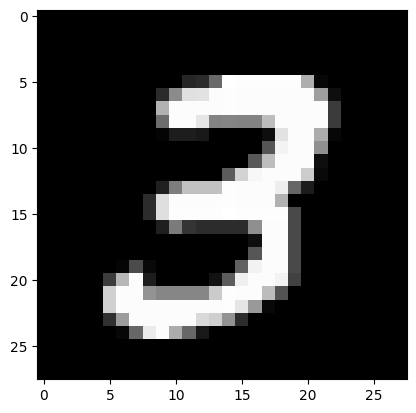

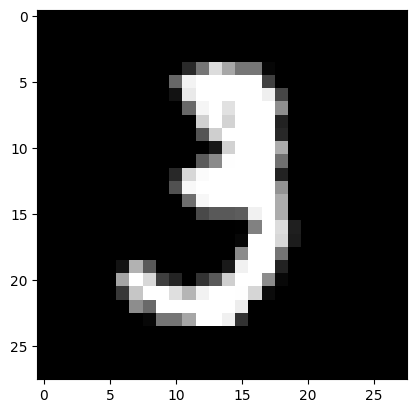

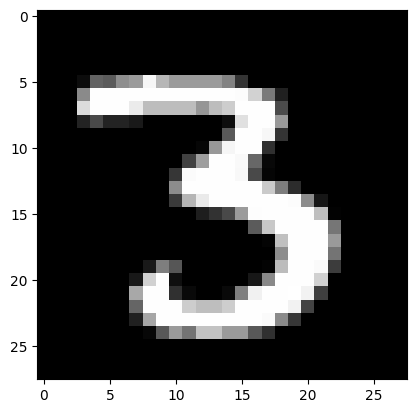

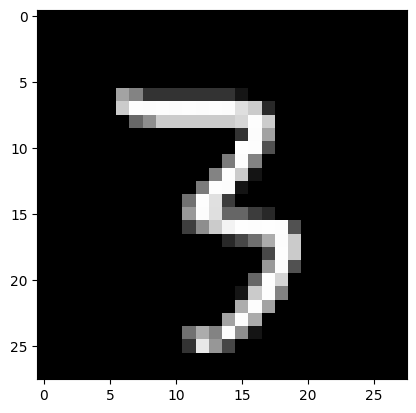

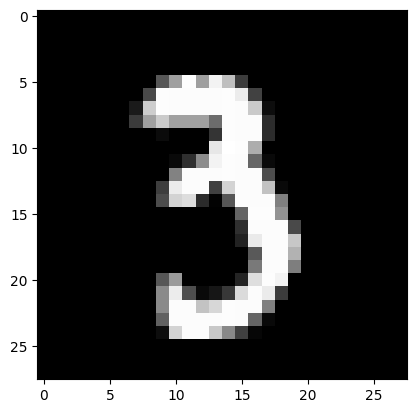

In [22]:
def plot(image_row):
    # Convert the list of integers into a numpy array and reshape
    image_2d = image_row.reshape(28, 28)
    
    # Plot the image
    plt.imshow(image_2d, cmap='gray')  # 'gray' colormap looks more natural for handwriting
    plt.show()

# correct "3" images
index = 0
total_images = 0
total = pred_result.shape[0]
while index < total and total_images < 5:
    if (pred_result[index] == 1) and (Y_filtered[index] == 1):
        plot(X_filtered[index])
        total_images += 1
    
    index += 1


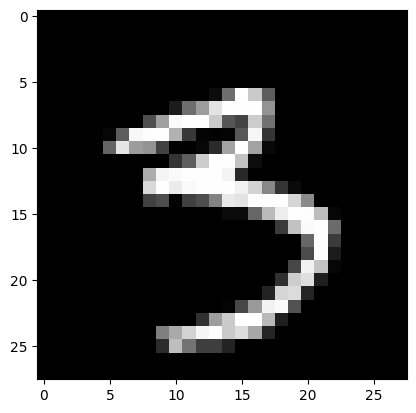

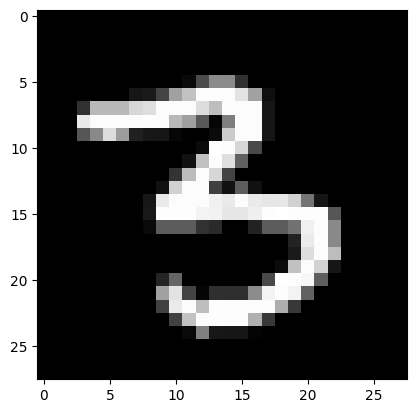

In [23]:
# incorrectly classified "3" images
index = 0
total_images = 0
total = pred_result.shape[0]
while index < total and total_images < 5:
    if (pred_result[index] == 0) and (Y_filtered[index] == 1):
        plot(X_filtered[index])
        total_images += 1
    
    index += 1


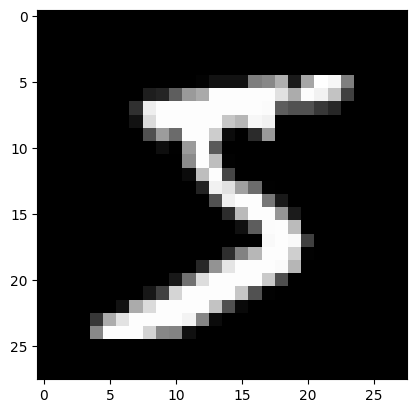

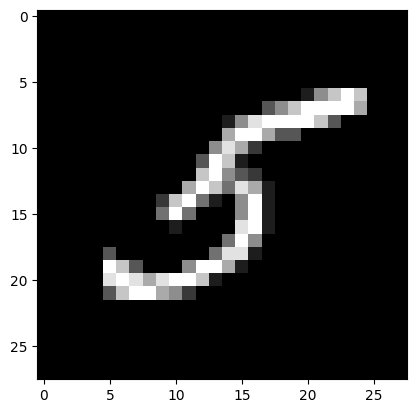

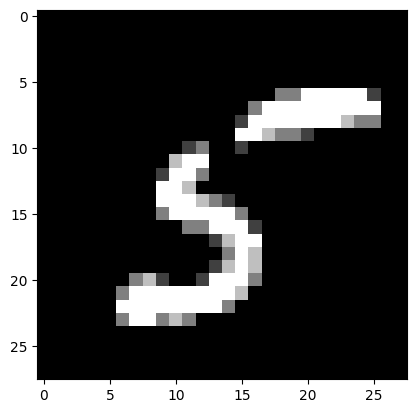

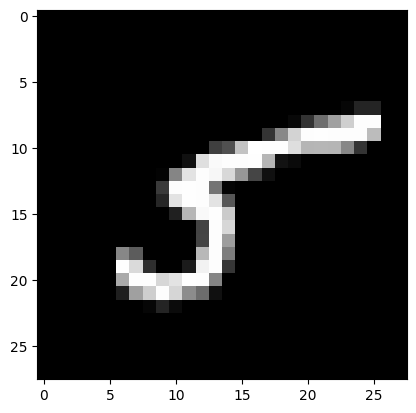

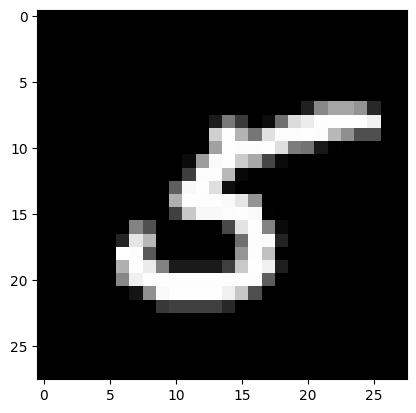

In [24]:
# correct "5" images
index = 0
total_images = 0
total = pred_result.shape[0]
while index < total and total_images < 5:
    if (pred_result[index] == 1) and (Y_filtered[index] == 0):
        plot(X_filtered[index])
        total_images += 1
    
    index += 1

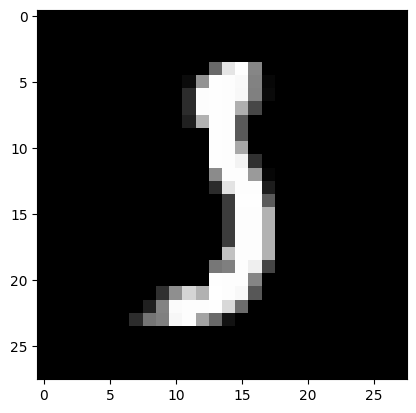

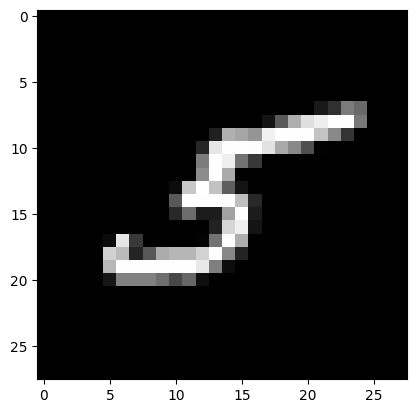

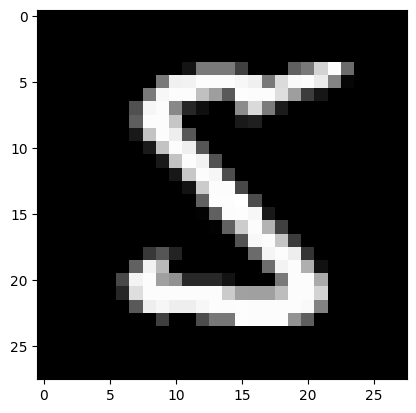

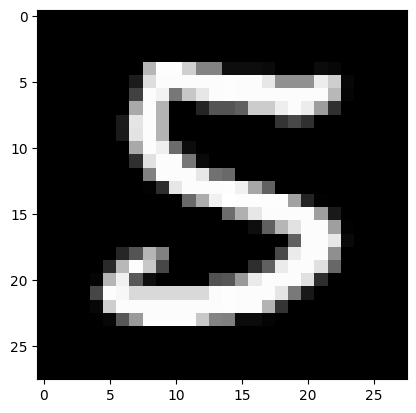

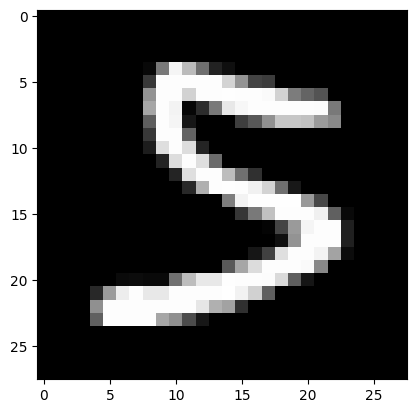

In [26]:
# incorrect "5" images
index = 0
total_images = 0
total = pred_result.shape[0]
while index < total and total_images < 5:
    if (pred_result[index] == 0) and (Y_filtered[index] == 0):
        plot(X_filtered[index])
        total_images += 1
    
    index += 1

# The misclassified ones are more difficult to intepret, so the result is reasonable.